# Exploration 1. 가위바위보 분류기 만들기

- 첫번째 exploration 가위바위보 분류기를 jupyter notebook으로 구현했습니다.

## 1) 가위바위보 이미지 데이터를 가져와서 사이즈를 28 * 28로 변경하기

- Python Image Library, tensorflow, numpy, matplotlib 를 활용했습니다.
- 이미지 사이즈를 28 * 28 로 조정하는 함수를 정의했습니다. (resize_images)

In [5]:
from PIL import Image
import os, glob
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 재조정하는 함수를 정의합니다.
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

    
# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 사이즈 변경
scissor_path = os.getenv("HOME") + "/aiffel/etc/rock_scissor_paper/scissor"
resize_images(scissor_path)
rock_path = os.getenv("HOME") + "/aiffel/etc/rock_scissor_paper/rock"
resize_images(rock_path)
paper_path = os.getenv("HOME") + "/aiffel/etc/rock_scissor_paper/paper"
resize_images(paper_path)

print("가위, 바위, 보 train 이미지 resize 완료!\n")

image_dir_path = os.getenv("HOME") + "/aiffel/etc/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/etc/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/etc/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위, 바위, 보 test 이미지 resize 완료!")

1527  images to be resized.
1527  images resized.
1532  images to be resized.
1532  images resized.
1527  images to be resized.
1527  images resized.
가위, 바위, 보 train 이미지 resize 완료!

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
가위, 바위, 보 test 이미지 resize 완료!


## 2) 가위바위보 train 데이터를 변수에 저장

- load_data 함수를 정의해서 train data 4586개를 불러옵니다.

In [6]:
def load_data(img_path, number_of_data=4586): 
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/etc/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4586 입니다.
x_train shape: (4586, 28, 28, 3)
y_train shape: (4586,)


라벨:  0


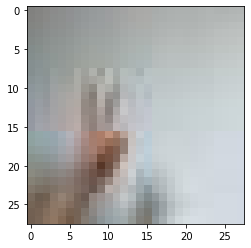

In [7]:
# train data의 0번째 인덱스 확인
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 3) 딥러닝 네트워크 설계 및 학습
- tensorflow keras의 Sequential 구현

In [8]:
# 딥러닝 네트워크 설계하기
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3))) # input_shape에는 이미지 사이즈에 맞는 값을 넣어줘야 합니다.
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 마지막 Dense 레이어에는 클래스 개수인 3을 넣어줘야 합니다.

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (No

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#모델을 학습(훈련)합니다.
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
144/144 [==============================] - 5s 14ms/step - loss: 1.0629 - accuracy: 0.4169
Epoch 2/10
144/144 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7835
Epoch 3/10
144/144 [==============================] - 0s 3ms/step - loss: 0.2585 - accuracy: 0.9114
Epoch 4/10
144/144 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9579
Epoch 5/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9757
Epoch 6/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9759
Epoch 7/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9970
Epoch 8/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9995
Epoch 9/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9683
Epoch 10/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.992

## 4) 테스트 데이터 예측해보기
- 훈련한 모델로 테스트 데이터를 예측해봅니다.

In [10]:
# 테스트 데이터를 불러오는 함수를 정의합니다.
def load_test_data(img_path, number_of_data=300):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트용 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


image_dir_path = os.getenv("HOME") + "/aiffel/etc/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

테스트용 데이터(x_test)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [11]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 1s - loss: 0.3661 - accuracy: 0.8567
test_loss: 0.36608797311782837 
test_accuracy: 0.8566666841506958


## 5) 회고
- 가위바위보 분류기에 제가 직접 찍은 가위바위보 이미지 300장을 훈련하고, 다른 사람의 데이터를 받아서 테스트했을 때에는 accuracy가 낮게 나왔습니다.
- 이를 개선하고자 AIFFEL 양재캠 노션 페이지에서 다른 사람들의 데이터를 가져와서 4586장을 훈련시켰고, 훈련 데이터셋에는 포함되지 않은 사람의 가위바위보 이미지 데이터 300장을 가져와서 테스트했습니다. 훈련했을 때의 정확도는 약 99%였지만, 테스트 정확도는 약 85%로 낮아졌습니다. 새로운 데이터를 예측하는 정확도가 낮아지긴 했지만, 어느 정도는 잘 맞추고 있습니다.
- 정리: 데이터의 양과 질이 중요하다는 것을 느꼈습니다. 편향된 데이터를 학습하면 새로운 데이터를 예측하기 힘듭니다. 따라서 다양한 데이터 셋을 많이 학습하는 것이 좋습니다. 그리고 이미지 데이터의 경우 화질이나 주변 배경(noise)에 따라 품질이 저하될 수 있습니다. 품질이 저하된 데이터를 학습하는 것은 도움이 되지 않습니다. 